In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import kala

import networkx as nx
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from kala.models.shocks import RemovePlayer, RemoveRandomPlayer, RemoveEdge, SwapRandomEdge, RemoveRandomEdge, SwapEdge, AddEdge, AddRandomEdge

In [4]:
from helper_functions import helper_diagonal_sbm
from main_functions import montecarlo_game_network, montecarlo_game_sbm

# How shocks impact the population of savers?

### We first start by setting up the constant parameters

In [5]:
## These are the constants not refering to the interactions

num_players = 50
num_steps = 200
num_simulations = 3

# number of initial proportion of savers
threshold = 0.5

In [6]:
## These are the constants refering to the interactions

# How much more do savers win when interacting with another
differential_efficient = 0.3
# How much do savers lose when interacting with a non-saver
differential_inefficient = 0.5

# Number of games that players save in their memory
memory_length = 4
# Memory rule
update_rule = kala.models.memory_rules.AllPastMemoryRule()

# Standard deviation of log normal distribution
def standard_deviation(eta):
    return eta**2


In [7]:
## This is the network that we are going to use

# SBM network
g, pos = helper_diagonal_sbm(num_players, p_off=0.1)

# Scale-free network
#m = np.random.randint(1, num_players)
#g = nx.barabasi_albert_graph(num_players, m)

### Example

In [46]:
## At time t we can introduce a shock into the system. 
## To do so, we create a list of emply lists with size num_steps.

shocks = [[] for _ in range(num_steps)]

## We will introduce a shock at time t = 10
t = 10 
shocks[t].append(RemoveRandomEdge(rng=0))

## We can include a sequence of shocks at a given time. This is
## the reason why we are including shocks as a list within a list.

t = 20
shocks[t].append(SwapRandomEdge(rng=0))
shocks[t].append(RemoveRandomPlayer(rng=0))

In [47]:
## The available shocks are:

player = 0
pivot = 0
player1 = 1
player2 = 2

shock = RemovePlayer(player) #Remove a given node player from the network. The shock also removes the adjacent edges to the selected node.
shock = RemoveRandomPlayer() #Remove a random node from the nework. The shock also removes the adjacent edges to the random node.
shock = RemoveEdge(player1, player2) #Remove the edge between player1 and player2 from the network.
shock = RemoveRandomEdge() #Removes a random edge from the network.
shock = SwapEdge(pivot, player1, player2) #Remove edge (pivot, player1) and add edge (pivot, player2) to the network.
shock = SwapRandomEdge() #Swap an edge between three random players as for the shock SwapEdge().
shock = AddEdge(player1, player2) #Add an edge between player1 and player2 to the network.
shock = AddRandomEdge() #Add an edge between two random players in the network.



  0%|          | 0/3 [00:00<?, ?it/s]

removing edge (InvestorAgent(uuid='hus4LA'), InvestorAgent(uuid='sX5aOv'))
swapping edge: (InvestorAgent(uuid='hus4LA'), InvestorAgent(uuid='iubg8Q')) -> (InvestorAgent(uuid='hus4LA'), InvestorAgent(uuid='pEMr3s'))
removing player InvestorAgent(uuid='hus4LA')


 33%|███▎      | 1/3 [00:00<00:00,  2.33it/s]

removing edge (InvestorAgent(uuid='aD2HLv'), InvestorAgent(uuid='sm4RjE'))
swapping edge: (InvestorAgent(uuid='wXLzbM'), InvestorAgent(uuid='os3TvK')) -> (InvestorAgent(uuid='wXLzbM'), InvestorAgent(uuid='gfJEas'))
removing player InvestorAgent(uuid='nwA2Bm')


 67%|██████▋   | 2/3 [00:00<00:00,  2.34it/s]

removing edge (InvestorAgent(uuid='xkPBTr'), InvestorAgent(uuid='bfH4cq'))
swapping edge: (InvestorAgent(uuid='eqv2A9'), InvestorAgent(uuid='aiTFvK')) -> (InvestorAgent(uuid='eqv2A9'), InvestorAgent(uuid='dOVG20'))
removing player InvestorAgent(uuid='p34nJ8')


100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


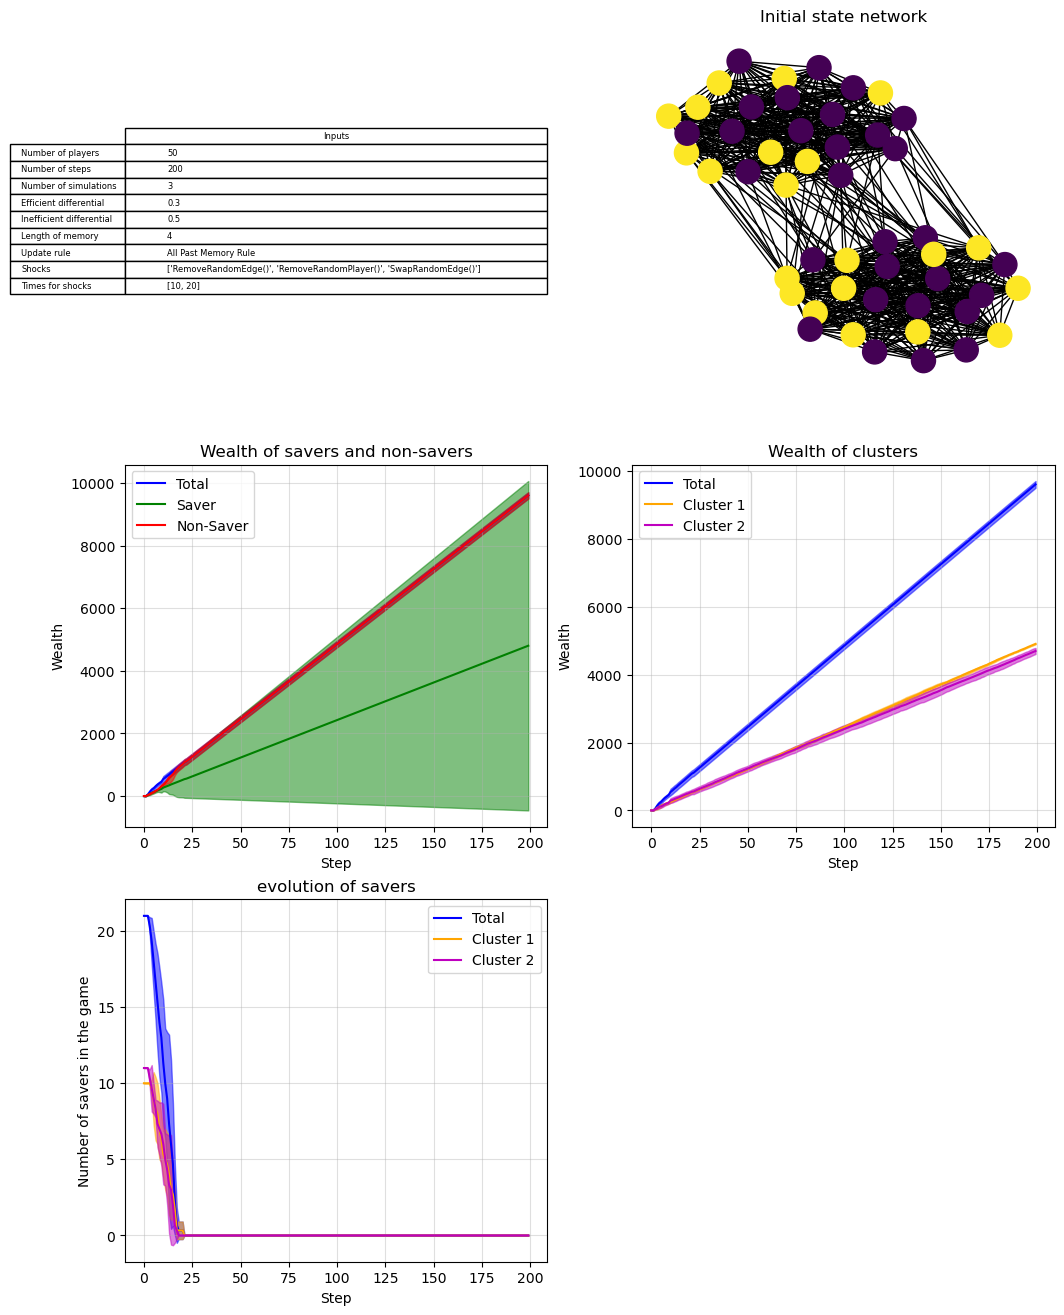

In [48]:
# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule,
    shocks,
    )

### Shocks at random times

In [39]:
shocks = [[] for _ in range(num_steps)]

## We can choose in which step and how many shocks we want

t1, t2, t3, t4, t5, t6 = np.random.randint(0, high=num_steps, size=6, dtype=int)

random_players = np.random.randint(0, high=num_players, size=3, dtype=int)

shocks[t1].append(RemoveEdge(u=random_players[0], v=random_players[1]))

shocks[t3].append(RemoveRandomEdge(rng=0))

shocks[t3].append(RemoveRandomPlayer(rng=0))

shocks[t5].append(SwapRandomEdge(rng=0))

shocks[t6].append(SwapRandomEdge())
shocks[t6].append(RemoveRandomEdge())


  0%|          | 0/3 [00:00<?, ?it/s]

removing edge (InvestorAgent(uuid='sxXL2U'), InvestorAgent(uuid='sReL9b'))
removing player InvestorAgent(uuid='qZxq08')
removing edge (3, 0)


 33%|███▎      | 1/3 [00:00<00:00,  2.32it/s]

swapping edge: (InvestorAgent(uuid='nWRpAg'), InvestorAgent(uuid='i5rfzw')) -> (InvestorAgent(uuid='nWRpAg'), InvestorAgent(uuid='fLK51v'))
removing edge (InvestorAgent(uuid='cLq8IV'), InvestorAgent(uuid='ty8zhA'))
swapping edge: (InvestorAgent(uuid='abrzHj'), InvestorAgent(uuid='lcRS94')) -> (InvestorAgent(uuid='abrzHj'), InvestorAgent(uuid='ddFvMj'))
removing edge (InvestorAgent(uuid='puKdx1'), InvestorAgent(uuid='bn3VPy'))
removing player InvestorAgent(uuid='lXtfId')
removing edge (3, 0)
swapping edge: (InvestorAgent(uuid='axcz9r'), InvestorAgent(uuid='tYnuxy')) -> (InvestorAgent(uuid='axcz9r'), InvestorAgent(uuid='hQM4YT'))
removing edge (InvestorAgent(uuid='zs7S9p'), InvestorAgent(uuid='puKdx1'))
swapping edge: (InvestorAgent(uuid='zpGqv9'), InvestorAgent(uuid='axcz9r')) -> (InvestorAgent(uuid='zpGqv9'), InvestorAgent(uuid='o0Me9y'))


 67%|██████▋   | 2/3 [00:00<00:00,  2.28it/s]

removing edge (InvestorAgent(uuid='lI7qXz'), InvestorAgent(uuid='bqxIHV'))
removing player InvestorAgent(uuid='dyRu4z')
removing edge (3, 0)


100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

swapping edge: (InvestorAgent(uuid='s07a15'), InvestorAgent(uuid='aKua41')) -> (InvestorAgent(uuid='s07a15'), InvestorAgent(uuid='b8n1UE'))
removing edge (InvestorAgent(uuid='g6cl2o'), InvestorAgent(uuid='lW1wYr'))
swapping edge: (InvestorAgent(uuid='r5VPvZ'), InvestorAgent(uuid='r1K5nr')) -> (InvestorAgent(uuid='r5VPvZ'), InvestorAgent(uuid='n21cVn'))


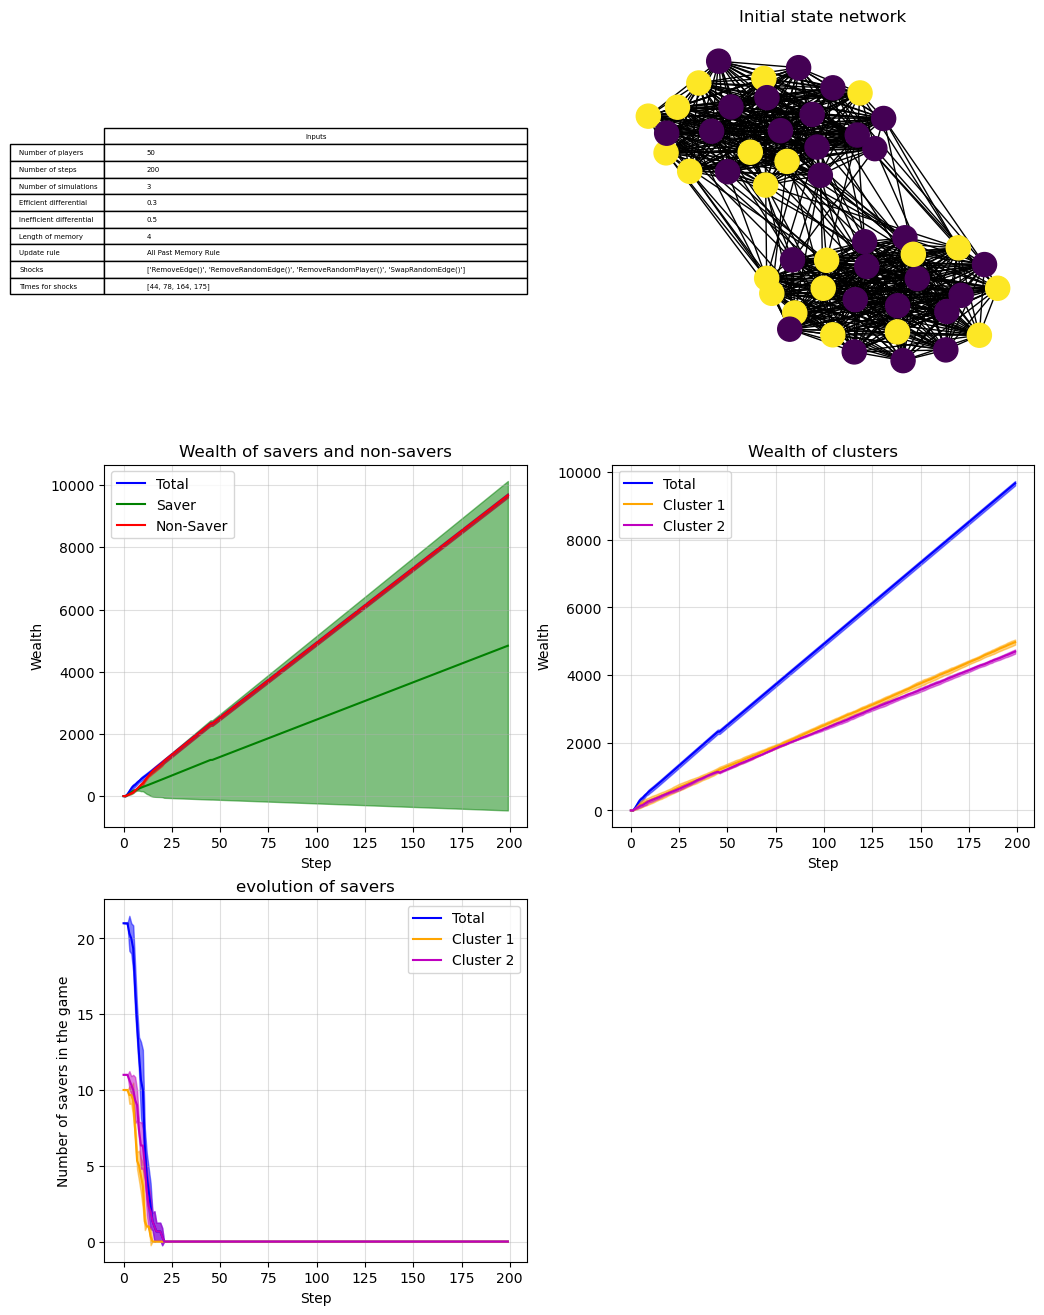

In [44]:
# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule,
    shocks,
    )